## Figures and tables for publication

### Beach litter surveillance, documenting student participation

#### Usage:

1. These figures and scripts are intended to be used for publication
2. Ask before you use
3. Give credit to both hammerdirt and the students from the EPFL _Solid Waste Engineering_ class

#### Contact:

1. roger@hammerdirt.ch
2. twitter @hammerdirt
3. https://mwshovel.pythonanywhere.com/

In [1]:
# python imports:
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt
import re
from scipy.stats import norm
import scipy.stats
from collections import Counter

import statsmodels.api as sm
import seaborn as sns
import json

# specific local imports
from get_data import *

## Getting data and formatting

### Retrieve data from the API

1. Define the URLS
2. Use the functions in the get_data import
3. Get the pcs/m values in a df

#### will seperate individual beaches later

In [2]:
# urls
urlLakeDailyTotals = "http://mwshovel.pythonanywhere.com/dirt/daily-total/Lac-Léman/?format=json"
urlLakeCodeData = "http://mwshovel.pythonanywhere.com/dirt/codes/Lac-Léman/?format=json"

# F getData() converts the from json to a data frame
lakeDailyTotals = getData(urlLakeDailyTotals)
lakeCodeTotals = getData(urlLakeCodeData)

# add a pcs/m column
lakeDailyPcsM = pcs_m(lakeDailyTotals)
lakeCodePcsM = pcs_m(lakeCodeTotals)

# get the log of the pcs/m column
lakeDailyPcsM = logOfPcsMeter(lakeDailyPcsM )

## Make charts

### Histogram of all results pcs/m and ln(pcs/m)

1. The function is in the local import "makeHist"

#### Histogram of all results pcs/m of trash

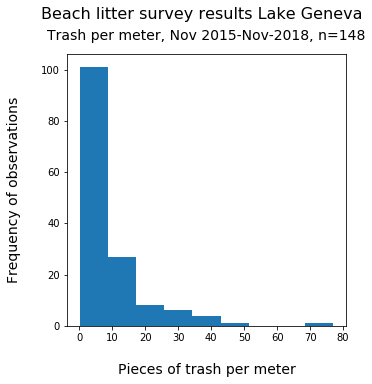

In [3]:
makeHist(lakeDailyPcsM.pcs_m, 9, (5, 5),"Trash per meter, Nov 2015-Nov-2018, n=", "Beach litter survey results Lake Geneva", "Pieces of trash per meter", "Frequency of observations", "graphs/histograms/pcsMhist.svg")

#### Histogram of all results log(pcs/m of trash)

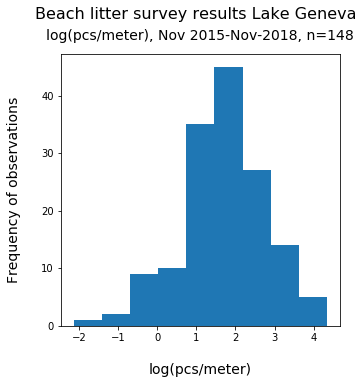

In [4]:
makeHist(lakeDailyPcsM.ln_pcs, 9, (5, 5),"log(pcs/meter), Nov 2015-Nov-2018, n=", "Beach litter survey results Lake Geneva", "log(pcs/meter)", "Frequency of observations", "graphs/histograms/logPcsMhist.svg")

### Year over year distribution of results

1. Use the mean and standard deviation of the log of the results
2. Create a graph that displays the results year over year

In [5]:
xS = makeYearResults("2016-11-15", "2017-11-15", "2018-11-15",lakeDailyPcsM, "ln_pcs")
Data = makeXandY(xS)
figSize = (8,7)
colors = ["r", "g", "b"]
labels = ["Year one", "Year two", "Year three"]
saveFig = "graphs/distributions/logYearOverYear.svg"

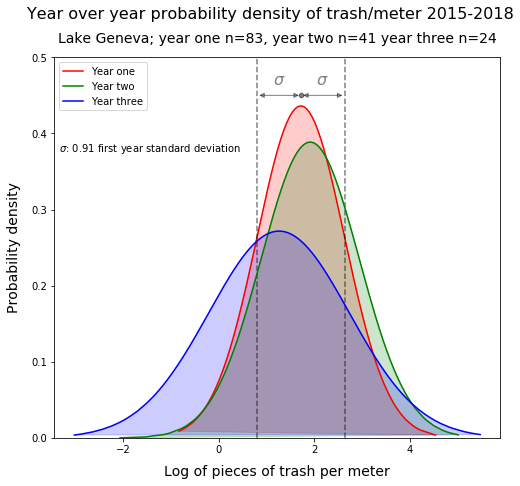

In [6]:
makeYearOverYear(Data, figSize, colors, labels, saveFig)

### Beaches surveyed

1. Beaches surveyed each year
2. Number of surveys per beach
3. Organizations that did the surveys

#### Collect the data

In [7]:
locations = makeYearResults("2016-11-15", "2017-11-15", "2018-11-15",lakeDailyPcsM, "location")
yearOneBeaches, yearTwoBeaches, yearThreeBeaches = set(locations[0]), set(locations[1]), set(locations[2])
numBeachesOne, numBeachesTwo, numBeachesThree = len(yearOneBeaches), len(yearTwoBeaches), len(yearThreeBeaches)

In [9]:
def makeStackBar(a, position):
    for n,aTuple in enumerate(a):
        beachSamplesYear(aTuple, n, position)
tuples =  countFrequency(locations)

#### Beaches surveyed each year:

#### Beaches year one:

Beaches surveyed year one:

Plage-de-St-Sulpice, Veveyse, Baye-de-Clarens, Baye-de-Montreux-D, Maladaire, Thonnon-les-Bains, Le-Pierrier, Oyonne, Arabie, Villa-Barton, Parc-des-Pierrettes, Le-Port, Boiron, Grand-Clos, Vidy, Pierrier-sud, Baye-de-Montreux-G, Bain-des-Dames, Jardin-Botanique


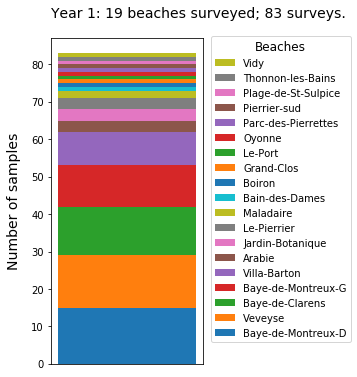

In [10]:
print("Beaches surveyed year one:\n")
print(*yearOneBeaches, sep = ", ")
makeStackBar([tuples[0]], 1)

#### Beaches year two:


Beaches surveyed year two:

Le-Pierrier, Oyonne, Baye-de-Montreux-D, Lac-Léman-Hammerdirt, lacléman_vidy_santie, Plage-de-St-Sulpice, Versoix, Baye-de-Montreux-G, lacléman_gland_kubela, Quai-Maria-Belgia, Veveyse, Arabie, Bain-des-Dames, Parc-des-Pierrettes, Lacléman_Gland_LecoanetS, Grand-Clos, Plage-de-Dorigny, La-Morges


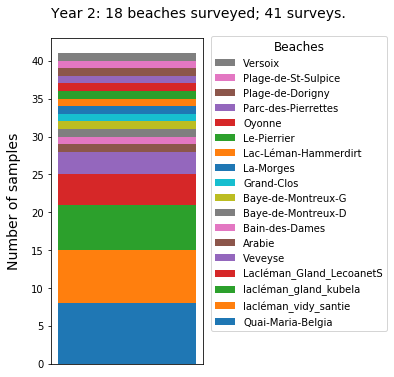

In [11]:
print("\nBeaches surveyed year two:\n")
print(*yearTwoBeaches, sep = ", ")
makeStackBar([tuples[1]], 2)

#### Beaches year three:


Beaches surveyed year three:

Tiger-duck-beach, Anarchy-Beach, Préverenges, lacléman_vidy_santie, lacléman_gland_kubela, Quai-Maria-Belgia, Arabie, Bain-des-Dames, Lacléman_Gland_LecoanetS, Saint-Sulpice


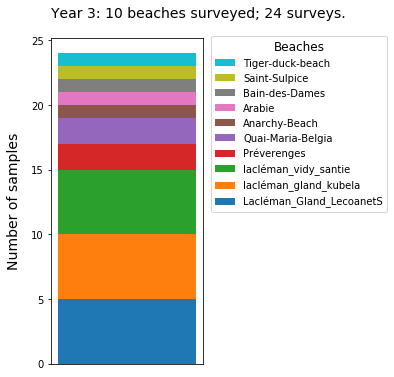

In [12]:
print("\nBeaches surveyed year three:\n")
print(*yearThreeBeaches, sep = ", ")
makeStackBar([tuples[2]], 3)